In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# jupyter 화면을 출력
%matplotlib inline
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font)

In [2]:
df = pd.read_csv('../data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20200430.csv', encoding='ms949')
df

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4670,제주,전체,2020,4,4085
4671,제주,전용면적 60㎡이하,2020,4,4039
4672,제주,전용면적 60㎡초과 85㎡이하,2020,4,4091
4673,제주,전용면적 85㎡초과 102㎡이하,2020,4,NaN


In [3]:
df = df.dropna()
df = df.rename(columns={'분양가격(㎡)':'분양가격'})
df['분양가격']=df['분양가격'].str.strip()
df = df.drop(df.loc[df['분양가격'] == ''].index)
df['분양가격'] = df['분양가격'].astype(int)

In [4]:
df['규모구분'] = df['규모구분'].str.replace('전용면적 ', '')

In [6]:
df.loc[df['지역명']=='서울'].groupby('연도')

In [7]:
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
...,...,...,...,...,...
4667,경남,60㎡초과 85㎡이하,2020,4,3159
4668,경남,85㎡초과 102㎡이하,2020,4,3246
4670,제주,전체,2020,4,4085
4671,제주,60㎡이하,2020,4,4039


<AxesSubplot:xlabel='연도'>

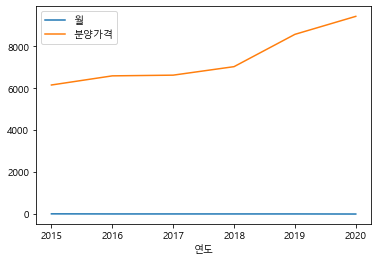

In [10]:
df.loc[df['지역명']=='서울'].groupby('연도').mean().plot()

<AxesSubplot:xlabel='연도'>

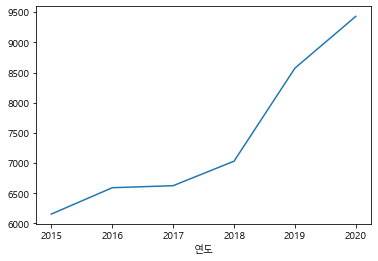

In [12]:
df_seoul = df.loc[df['지역명'] =='서울']
df_seoul_group = df_seoul.groupby('연도')
df_seoul_group_price_mean = df_seoul_group['분양가격'].mean()
df_seoul_group_price_mean.plot()

<AxesSubplot:ylabel='지역명'>

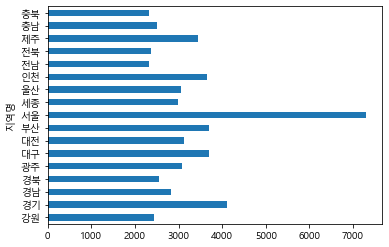

In [13]:
df.groupby('지역명')['분양가격'].mean().plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

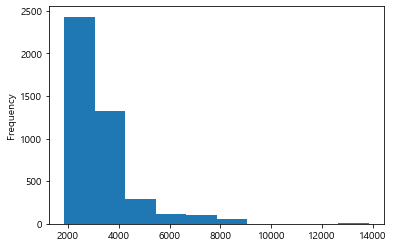

In [14]:
# 분양가격 히스토그램, 커널밀도, 박스플로
df['분양가격'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


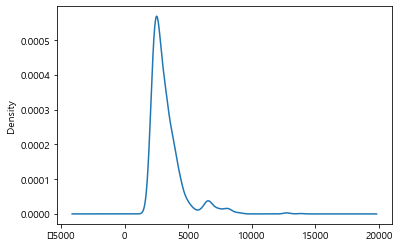

In [15]:
df['분양가격'].plot(kind='kde')

<AxesSubplot:xlabel='분양가격', ylabel='연도'>

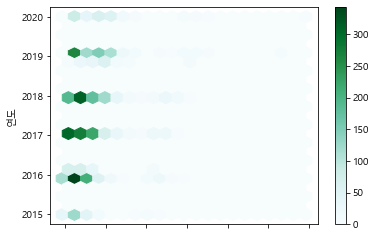

In [17]:
# 고밀도 산점도그래프
df.plot(kind='hexbin', x='분양가격', y='연도', gridsize=20)

<AxesSubplot:>

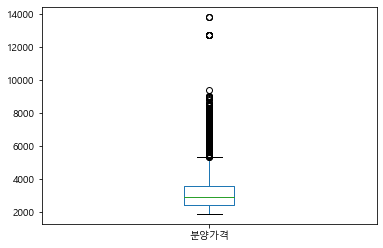

In [18]:
# 박스플롯
df['분양가격'].plot(kind='box')

<AxesSubplot:xlabel='월'>

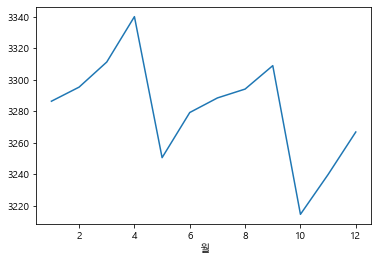

In [20]:
# 월별 분양가격(선그래프)
df.groupby('월')['분양가격'].mean().plot()